--Select a universe of 100 stocks spread across different industry verticals – information technology, utilities, banking and financial services, midcaps, large caps etc.
Download previous year’s balance sheets for all and calculate the following metrics:--

- Earnings Yield
- EBITA
- Free cash flow yield
- Return on Capital Employed
- Book to Market

In [114]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

start = datetime.datetime(2014, 6, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL','MSFT', 'FB', 'GOOG', 'NFLX', 'AMZN', 'HD', 'BA', 'LMT','RTN']
data = data.DataReader(['AAPL','MSFT', 'FB', 'GOOG', 'NFLX', 'AMZN', 'HD', 'BA', 'LMT','RTN'], 'yahoo', start, end)
data = data['Open']
data = data.sort_index(axis=0, ascending=True)
data.head()

,AAPL,AMZN,BA,FB,GOOG,HD,LMT,MSFT,NFLX,RTN
Date,,,,,,,,,,
2014-06-02,90.565712,312.589996,135.500000,63.230000,557.633850,80.250000,163.880005,40.950001,59.925713,97.089996
2014-06-03,89.779999,305.750000,135.800003,62.619999,547.976929,80.190002,164.110001,40.599998,59.998573,97.349998
2014-06-04,91.062859,306.850006,135.539993,62.450001,538.538818,80.320000,163.490005,40.209999,59.537144,97.860001
2014-06-05,92.314285,308.100006,135.649994,63.660000,543.412048,80.669998,164.529999,40.590000,60.535713,98.180000
2014-06-06,92.842857,325.000000,137.389999,63.369999,555.008240,80.580002,166.529999,41.480000,61.430000,97.910004


In [115]:
df_normalized = data / data.iloc[0]
df_normalized.head()

,AAPL,AMZN,BA,FB,GOOG,HD,LMT,MSFT,NFLX,RTN
Date,,,,,,,,,,
2014-06-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-06-03,0.991324,0.978118,1.002214,0.990353,0.982682,0.999252,1.001403,0.991453,1.001216,1.002678
2014-06-04,1.005489,0.981637,1.000295,0.987664,0.965757,1.000872,0.997620,0.981929,0.993516,1.007931
2014-06-05,1.019307,0.985636,1.001107,1.006801,0.974496,1.005234,1.003966,0.991209,1.010179,1.011227
2014-06-06,1.025144,1.039701,1.013948,1.002214,0.995292,1.004112,1.016170,1.012943,1.025103,1.008446


In [116]:
returns = np.log(data / data.shift(1))
returns.tail()

,AAPL,AMZN,BA,FB,GOOG,HD,LMT,MSFT,NFLX,RTN
Date,,,,,,,,,,
2017-12-22,0.002924,-0.003254,-0.005788,-0.004506,-0.003612,0.003029,-0.002197,-0.007582,-0.005877,-0.000748
2017-12-26,-0.022462,-0.003179,-0.002669,-0.002883,-0.002869,0.000371,0.000188,-0.001054,0.007670,0.003043
2017-12-27,-0.004107,0.009837,0.002939,-0.000453,-0.000643,0.010920,0.004106,0.003978,-0.010488,-0.002562
2017-12-28,0.005277,0.007674,-0.002026,0.007898,-0.005491,0.001625,0.000500,0.002915,-0.003307,0.003787
2017-12-29,-0.002811,-0.005609,0.003813,0.000281,-0.004651,-0.000891,0.007445,-0.003148,0.028077,0.006738


In [117]:
df_normalized.head()

,AAPL,AMZN,BA,FB,GOOG,HD,LMT,MSFT,NFLX,RTN
Date,,,,,,,,,,
2014-06-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-06-03,0.991324,0.978118,1.002214,0.990353,0.982682,0.999252,1.001403,0.991453,1.001216,1.002678
2014-06-04,1.005489,0.981637,1.000295,0.987664,0.965757,1.000872,0.997620,0.981929,0.993516,1.007931
2014-06-05,1.019307,0.985636,1.001107,1.006801,0.974496,1.005234,1.003966,0.991209,1.010179,1.011227
2014-06-06,1.025144,1.039701,1.013948,1.002214,0.995292,1.004112,1.016170,1.012943,1.025103,1.008446


In [118]:
allocation = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
df_allocated = df_normalized * allocation
df_allocated.head()

,AAPL,AMZN,BA,FB,GOOG,HD,LMT,MSFT,NFLX,RTN
Date,,,,,,,,,,
2014-06-02,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2014-06-03,0.099132,0.097812,0.100221,0.099035,0.098268,0.099925,0.100140,0.099145,0.100122,0.100268
2014-06-04,0.100549,0.098164,0.100030,0.098766,0.096576,0.100087,0.099762,0.098193,0.099352,0.100793
2014-06-05,0.101931,0.098564,0.100111,0.100680,0.097450,0.100523,0.100397,0.099121,0.101018,0.101123
2014-06-06,0.102514,0.103970,0.101395,0.100221,0.099529,0.100411,0.101617,0.101294,0.102510,0.100845


In [119]:
initial_investment = 10000
df_position = df_allocated * initial_investment
df_position.head()

,AAPL,AMZN,BA,FB,GOOG,HD,LMT,MSFT,NFLX,RTN
Date,,,,,,,,,,
2014-06-02,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2014-06-03,991.324388,978.118314,1002.214044,990.352665,982.682326,999.252361,1001.403441,991.452918,1001.215839,1002.677948
2014-06-04,1005.489351,981.637320,1000.295151,987.664099,965.757043,1000.872274,997.620210,981.929134,993.515822,1007.930838
2014-06-05,1019.307230,985.636169,1001.106967,1006.800569,974.496164,1005.233620,1003.966280,991.208767,1010.179270,1011.226739
2014-06-06,1025.143566,1039.700580,1013.948332,1002.214123,995.291516,1004.112174,1016.170331,1012.942588,1025.102530,1008.445855


In [120]:
df_portfolio_value = pd.DataFrame(df_position.sum(axis=1))
df_portfolio_value.columns = ['Portfolio_Valuation']
df_portfolio_value.head()

,Portfolio_Valuation
Date,
2014-06-02,10000.000000
2014-06-03,9940.694246
2014-06-04,9922.711242
2014-06-05,10009.161774
2014-06-06,10143.071596


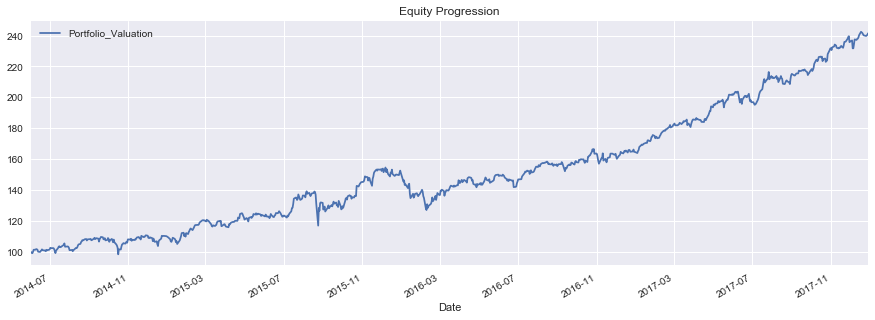

In [121]:
perf = df_portfolio_value.calc_stats()
perf.plot()

In [122]:
print perf.display()

Stat                 Portfolio_Valuation
-------------------  ---------------------
Start                2014-06-02
End                  2017-12-29
Risk-free rate       0.00%

Total Return         141.43%
Daily Sharpe         1.50
Daily Sortino        1.79
CAGR                 27.96%
Max Drawdown         -17.78%
Calmar Ratio         1.57

MTD                  2.43%
3m                   11.51%
6m                   21.88%
YTD                  46.55%
1Y                   46.55%
3Y (ann.)            29.85%
5Y (ann.)            27.96%
10Y (ann.)           27.96%
Since Incep. (ann.)  27.96%

Daily Sharpe         1.50
Daily Sortino        1.79
Daily Mean (ann.)    26.13%
Daily Vol (ann.)     17.38%
Daily Skew           -0.65
Daily Kurt           18.60
Best Day             9.78%
Worst Day            -10.73%

Monthly Sharpe       1.78
Monthly Sortino      3.18
Monthly Mean (ann.)  26.02%
Monthly Vol (ann.)   14.64%
Monthly Skew         0.23
Monthly Kurt         0.95
Best Month           13.46%


In [123]:
perf.stats

,Portfolio_Valuation
start,2014-06-02 00:00:00
end,2017-12-29 00:00:00
rf,0
total_return,1.41435
daily_sharpe,1.50294
daily_sortino,1.79418
cagr,0.279552
max_drawdown,-0.177776
calmar,1.57249
mtd,0.0243117


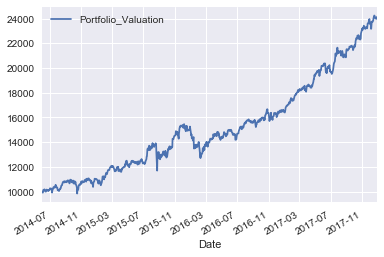

In [124]:
df_portfolio_value.plot()

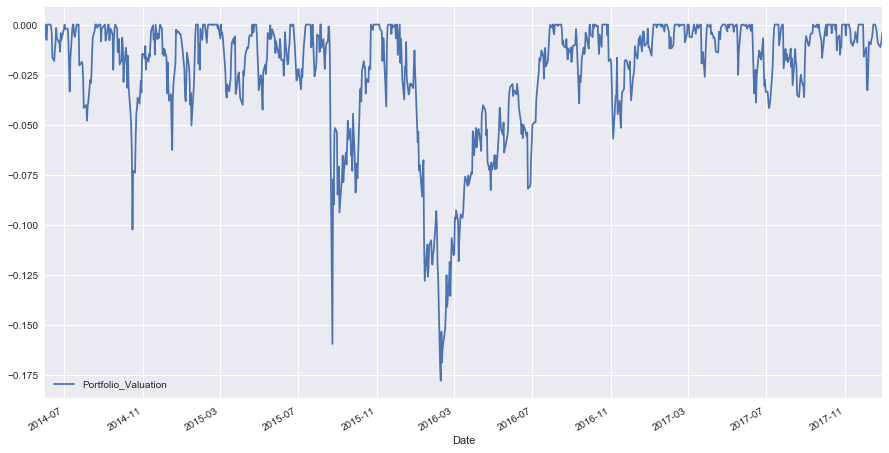

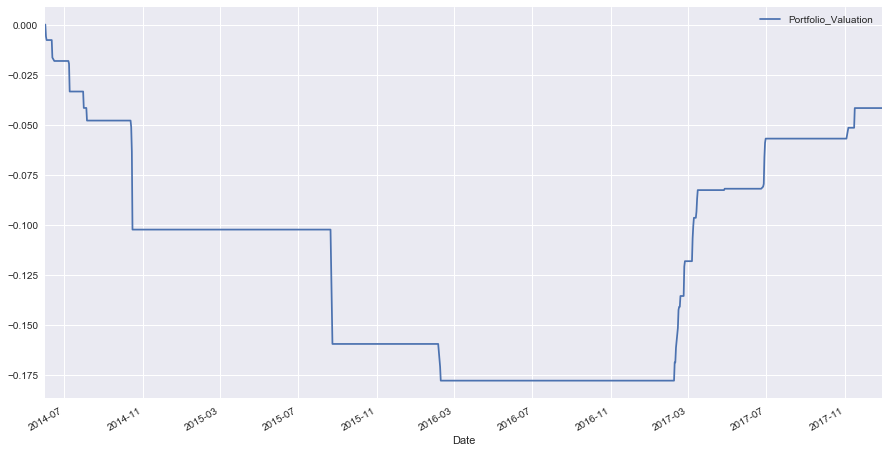

In [125]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = df_portfolio_value.rolling(window, min_periods=1).max()
daily_drawdown = df_portfolio_value/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot(legend=True,figsize=(15,8))
max_daily_drawdown.plot(legend=True,figsize=(15,8))

# Show the plot
plt.show()